In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\RAJSHREE\Anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\RAJSHREE\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.noijjg62emaszi6nyurl6jbkm4evbgm7.gfortran-win_amd64.dll
C:\Users\RAJSHREE\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
#Reading csv file
df_stocks=pd.read_csv(r"E:\Flip robo Internship\Assignments\Assignment 19\Company Stock and Investment.csv")
df_stocks

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793


In [3]:
# Displaying first few rows
df_stocks.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
# Making a separate dataframe for Gold Investments

df_stocks_gold=pd.DataFrame({"Date":df_stocks.Date,"Gold":df_stocks['Gold Investments']})
df_stocks_gold

,Date,Gold
0,31-12-2009,0.000150
1,04-01-2010,0.001097
2,05-01-2010,0.001560
3,06-01-2010,0.006009
4,07-01-2010,0.000221
...,...,...
1979,09-11-2017,0.000623
1980,10-11-2017,-0.000389
1981,13-11-2017,-0.004944
1982,14-11-2017,-0.002621


In [5]:
# convert  datatype into datetime datatype

df_stocks_gold['Date']=pd.to_datetime(df_stocks_gold['Date'])

#preprocessing (since arima takes univariate series as input so we setting date feature as index)
df_stocks_gold.set_index('Date',inplace=True)

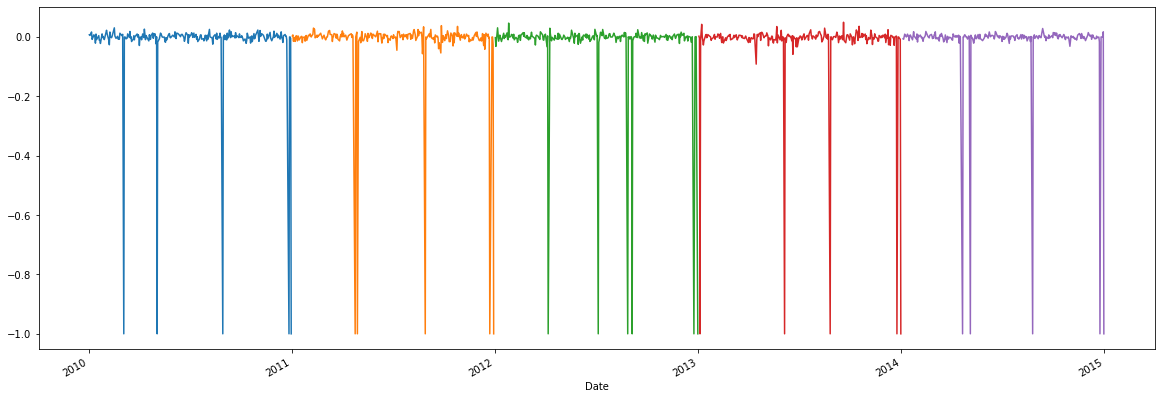

In [6]:
# Plotting graphs for different year to get better knowledge of the seasonality of the data(for year 2010 -2014)...
plt.subplots(figsize=(20,7))
df_stocks_gold.loc['2010', 'Gold'].plot()
df_stocks_gold.loc['2011', 'Gold'].plot()
df_stocks_gold.loc['2012', 'Gold'].plot()
df_stocks_gold.loc['2013', 'Gold'].plot()
df_stocks_gold.loc['2014', 'Gold'].plot()

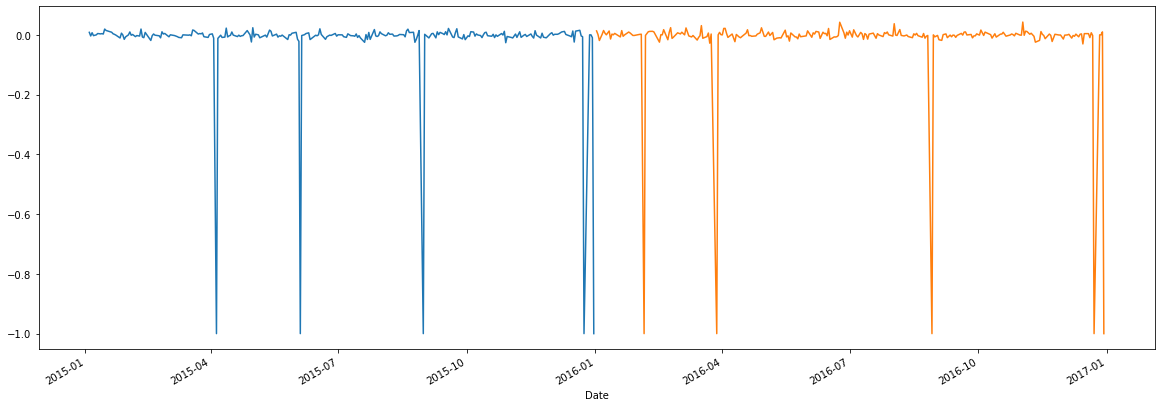

In [7]:
# Plotting graphs for different year to get better knowledge of the seasonality of the data(2015 -2016)...
plt.subplots(figsize=(20,7))
df_stocks_gold.loc['2015', 'Gold'].plot()
df_stocks_gold.loc['2016', 'Gold'].plot()

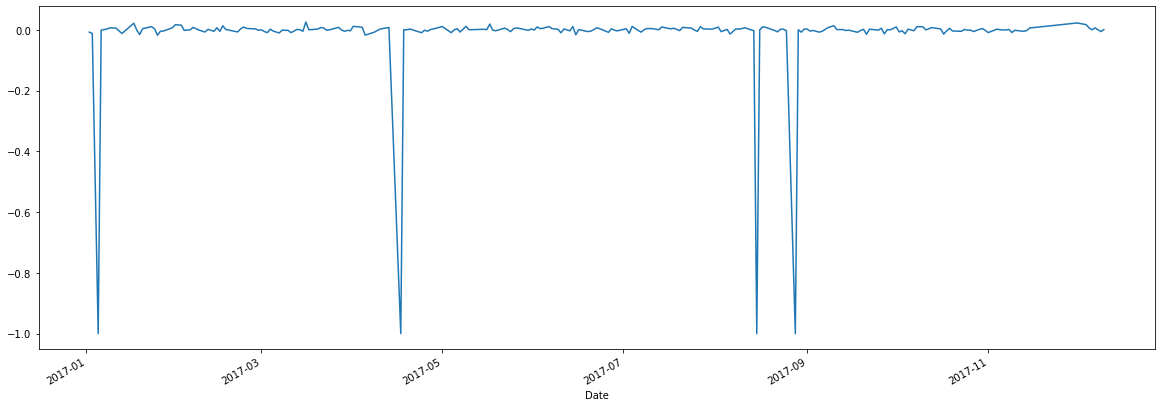

In [8]:
# Plotting data for year 2017..
plt.subplots(figsize=(20,7))
df_stocks_gold.loc['2017', 'Gold'].plot()

* In above plot data looks like seasonal data. Now we will check if data is stationary or not

In [9]:
#Ho: It is non stationary
#H1: It is stationary
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [10]:
# displaying adfuller values

adfuller_test(df_stocks_gold['Gold'])

ADF Test Statistic : -15.906853851669009
p-value : 8.208405770369951e-29
#Lags Used : 7
Number of Observations Used : 1976
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


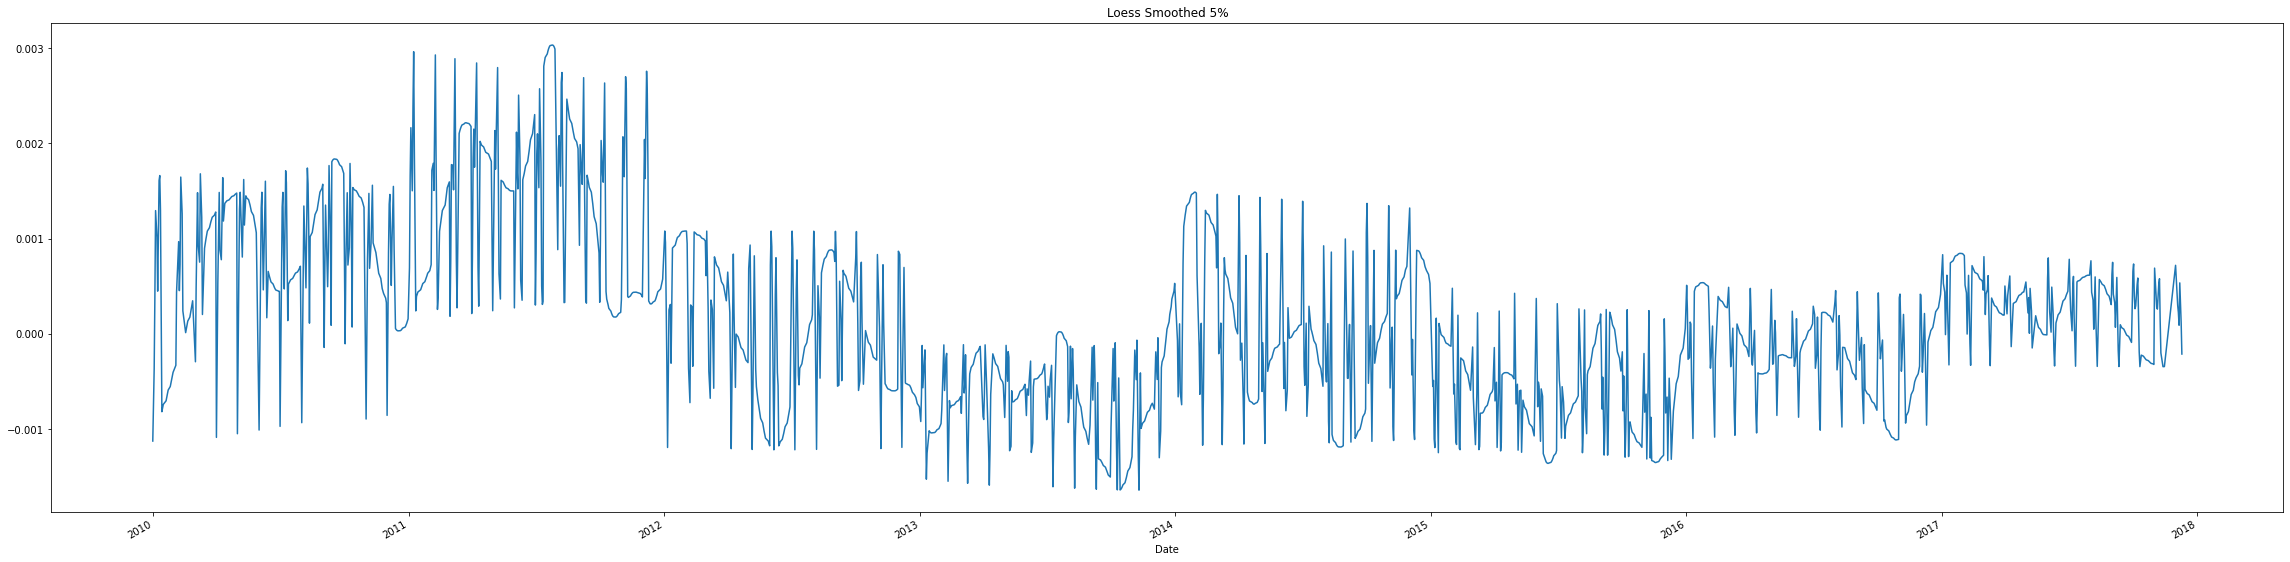

In [11]:
# Smooth graph for the data

from statsmodels.nonparametric.smoothers_lowess import lowess
df_loess_5 = pd.DataFrame(lowess(df_stocks_gold.Gold, np.arange(len(df_stocks_gold.Gold)), frac=0.05)[:, 1], index=df_stocks_gold.index, columns=['Gold'])
df_loess_5['Gold'].plot( title='Loess Smoothed 5%',figsize=(40,10))

>> To visualise the data clearly we  use smoothers_lowess

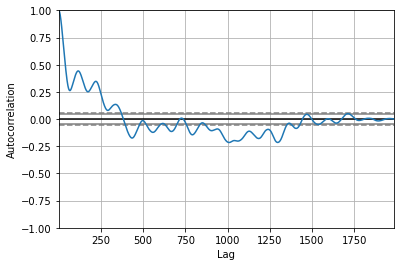

In [12]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_loess_5['Gold'])
plt.show()

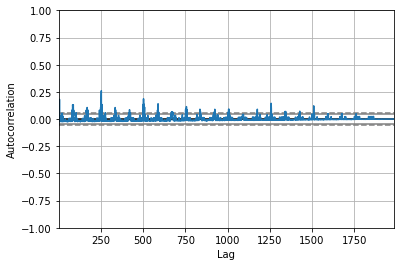

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_stocks_gold['Gold'])
plt.show()

* **In above plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values**

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

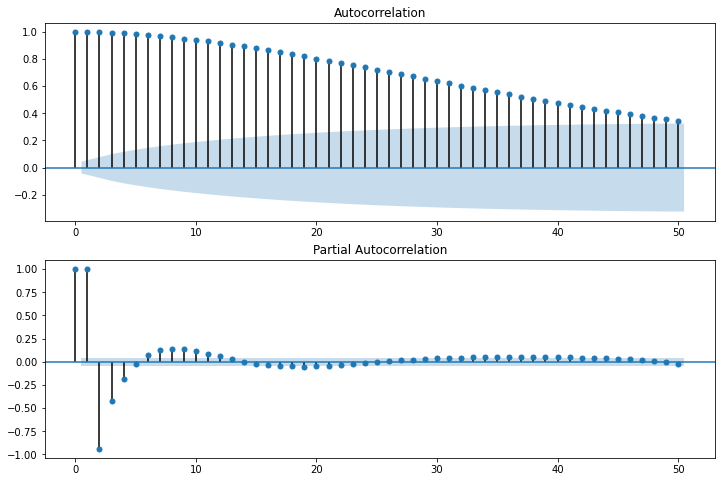

In [15]:
# Plotting autocorreltion plot partial autocorreltion plot

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(df_loess_5['Gold'].iloc[1:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_loess_5['Gold'].iloc[1:],lags=50,ax=ax2)

>> Plotting ACF and PACF graphs will get us p and q values and d=0 as the data is stationary but from above ACF and PACf graphs  we can say the values of p and q is not clear,so its difficult to implement arima so we are going to use auto_arima.


In [16]:
# Create Training and Validation sets
# train contains 6yr data (2009-2016)
train = df_stocks_gold['Gold'][:1512]
# test contains 2yr data (2016-2017)
validation=df_stocks_gold['Gold'][1513:1986]

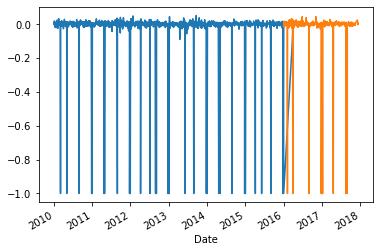

In [17]:
#plotting the data
train.plot()
validation.plot()

>> In Auto ARIMA, it will generate itself the optimal p, d, and q values which would be suitable for the data set to provide better forecasting.

In [18]:
import pmdarima as pm
pmodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=18.53 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-562.871, Time=1.19 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-966.509, Time=6.54 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=13.88 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-564.804, Time=0.38 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-560.876, Time=0.87 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-1131.054, Time=17.49 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=50.05 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=15.42 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-1132.966, Time=12.34 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=-968.262, Time=3.09 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=25.67 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=12.38 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=-1131.054, Time=11.67 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   

In [19]:
pmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                 1512
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                 570.434
Date:                  Sun, 01 Nov 2020   AIC                          -1134.869
Time:                          23:32:28   BIC                          -1118.929
Sample:                               0   HQIC                         -1128.930
                                 - 1512                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6587      0.012    -53.635      0.000      -0.683      -0.635
ar.S.L24      -0.3288      0.012    -26.317      0.000      -0.353      -0.304
sigma2         0.0273      0.000    102.081      0.000       0.027       0.028
===================================================================================
Ljung-Box (Q):                      224.93   Jarque-Bera (JB):             45328.50
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -4.09
Prob(H) (two-sided):                  0.66   Kurtosis:                        28.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

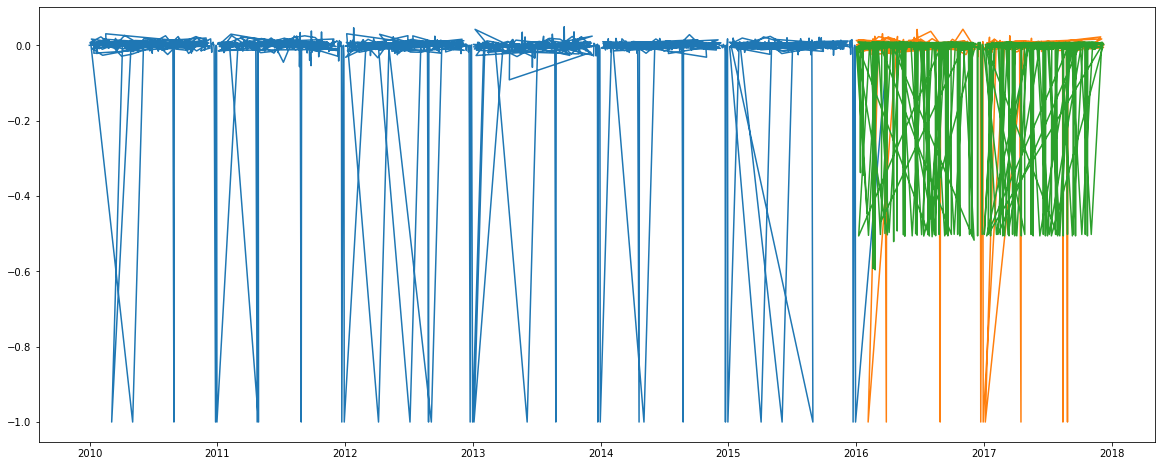

In [20]:
# Forecasting the model over validation data i.e 2017 and 2018


forecast = pmodel.predict(n_periods=len(validation))
forecast = pd.DataFrame(forecast,index = validation.index,columns=['Prediction'])

#plot the predictions for validation set
plt.subplots(figsize=(20,8))
plt.plot(train, label='Train')
plt.plot(validation, label='Valid')
plt.plot(forecast, label='Prediction')

plt.show()

In [21]:
# Printing Errors..
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(validation, forecast)
print('MSE(Mean Squarred Error): '+str(mse))
mae = mean_absolute_error(validation, forecast)
print('MAE(Mean Absolute Error): '+str(mae))
rmse = np.sqrt(mean_squared_error(validation, forecast))
print('RMSE(Root Mean Squared Error): '+str(rmse))

MSE(Mean Squarred Error): 0.058604619714704494
MAE(Mean Absolute Error): 0.10649029071189042
RMSE(Root Mean Squared Error): 0.24208391048292427


In [22]:
# Saving the data in a dataframe

forecast["Previous"]=df_stocks_gold["Gold"]

In [23]:
forecast

,Prediction,Previous
Date,,
2016-06-01,0.005462,0.013370
2016-07-01,-0.006665,0.013698
2016-08-01,-0.000619,-0.004067
2016-11-01,0.006224,-0.000998
2016-12-01,0.004538,-0.013945
...,...,...
2017-09-11,-0.505764,0.000623
2017-10-11,-0.003736,-0.000389
2017-11-13,0.007745,-0.004944


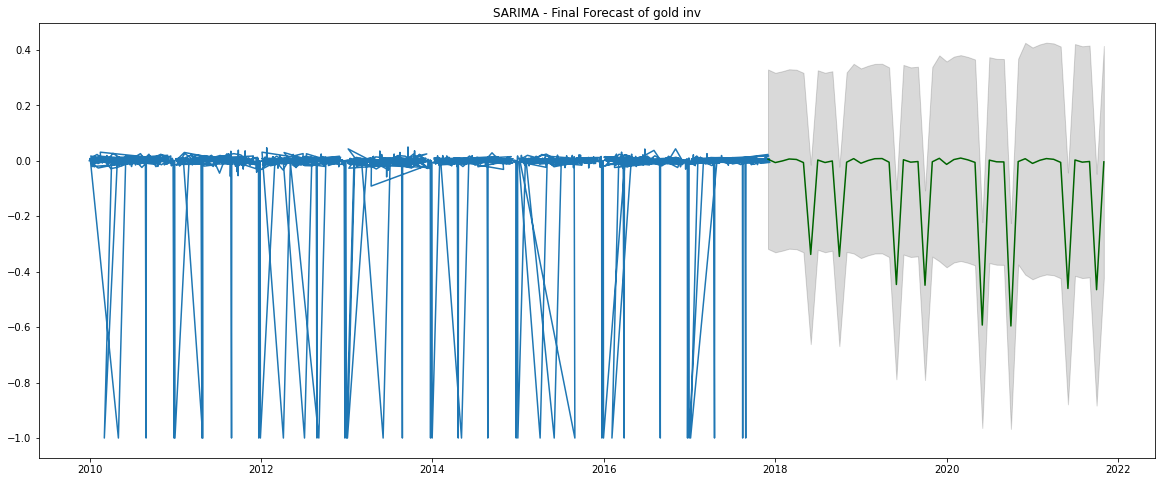

In [24]:
# Forecasting the model over the 2019 , 2020 and 2021 year

fitted, confint = pmodel.predict(n_periods=48, return_conf_int=True)
index_of_fc = pd.date_range(validation.index[-1], periods = 48, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.subplots(figsize=(20,8))
plt.plot(df_stocks_gold)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of gold inv")
plt.show()

In [25]:
# Let's create a dataframe to take  forecast values and thn give the column name to those values i.e Date and Gold_Pred
fitted_series_pred = pd.DataFrame(fitted_series,columns=["Gold_Pred"]) 
fitted_series_pred.index.name="Date"
fitted_series_pred

,Gold_Pred
Date,
2017-12-01,0.005462
2018-01-01,-0.006665
2018-02-01,-0.000619
2018-03-01,0.006224
2018-04-01,0.004538
2018-05-01,-0.006654
2018-06-01,-0.337899
2018-07-01,0.002480
2018-08-01,-0.006471


In [27]:
#Save the predicted values into a excel file
fitted_series_pred.to_excel(r"E:\Flip robo Internship\Assignments\Assignment 19\Gold_Investments_Prediction.xlsx")

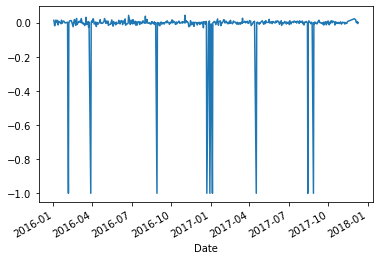

In [28]:
validation.plot(label='Previous data')

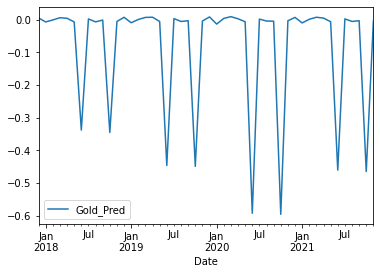

In [29]:
fitted_series_pred.plot()

## Conclusion
>> 1)In 2011, 2012, 2015, 2016, the prices were low so that was the time to hold the stocks.

>> 2) In 2017 and 2018(forecasted) the values is increase little bit as compared to previous year

>> 3) In 2019,2020,2021 years which is forcasted values are keep decreasing , so according to the model values keep decreasing
per year specially in month of aug of that year so its better to sell the gold stocks in month of november or december as its values is more in these months so sell it immediately as its value further could be  decrease again in next year in july-sep month.